# Prior estimation

In [1]:
include("src/main.jl")
OPTCONFIG=OptConfig(XTOLABS=1e-8, DEBUG=true);

INFO: Recompiling stale cache file /home/numerik/bzfsikor/.julia/lib/v0.6/Parameters.ji for module Parameters.
INFO: Recompiling stale cache file /home/numerik/bzfsikor/.julia/lib/v0.6/Rmath.ji for module Rmath.
INFO: Recompiling stale cache file /home/numerik/bzfsikor/.julia/lib/v0.6/Distributions.ji for module Distributions.
INFO: Recompiling stale cache file /home/numerik/bzfsikor/.julia/lib/v0.6/NLopt.ji for module NLopt.
INFO: Recompiling stale cache file /home/numerik/bzfsikor/.julia/lib/v0.6/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /home/numerik/bzfsikor/.julia/lib/v0.6/TableTraitsUtils.ji for module TableTraitsUtils.
INFO: Recompiling stale cache file /home/numerik/bzfsikor/.julia/lib/v0.6/Seaborn.ji for module Seaborn.


In [9]:
# enable pyplot-latex
PyCall.PyDict(PyPlot.matplotlib["rcParams"])["text.usetex"] = true

true

## The Model

In [2]:
# exponential
xlims = (0,4)
n = 200 # was 500
ndata = 100
σ = 0.3
prior = Truncated(MixtureModel([Normal(mu, .5) for mu in [1, 3]]), xlims...)


t    = Transformation(x->exp(x), x->log(x))

Transformation(#80, #81)

In [3]:
srand(90)
#srand(2)
m = FEModel(f=x->x, xs=linspace(xlims...,n), σ=σ)
d = generatedata(m, prior, ndata);
mt   = transformmodel(m, t)

FEModel(ft, 1.0:0.2693374373524836:54.598150033144236, 0.3)

In [4]:
ncv = 20
kfold = length(d);

In [5]:
lims = ([0,4],[0,.6],[1,55], [0,.2])

([0, 4], [0.0, 0.6], [1, 55], [0.0, 0.2])

## Results

In [6]:
figsize=(4,3)

(4, 3)

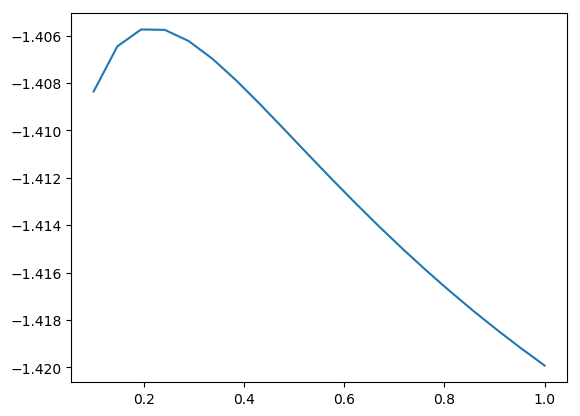

 60.603863 seconds (169.42 M allocations: 157.425 GiB, 20.47% gc time)


0.19473684210526315

In [7]:
## er estimator
regs = [ReferenceRegularizer(m, γ) for γ in linspace(0.1,1,ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regR = regs[indmax(ss)].γ

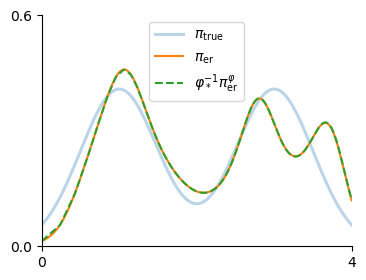

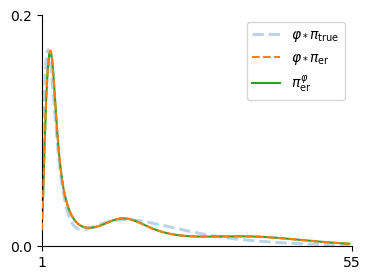

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f340fb20f50>), PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f340a24c490>))

In [8]:
wR  = ebprior(m,  d, ReferenceRegularizer(m,  regR))
wRt = ebprior(mt, d, ReferenceRegularizer(mt, regR))

p1, p2 = compareplot(m, t, pdf.(prior, m.xs), wR, wRt, "er", lims...; figsize=figsize, savename="eb")

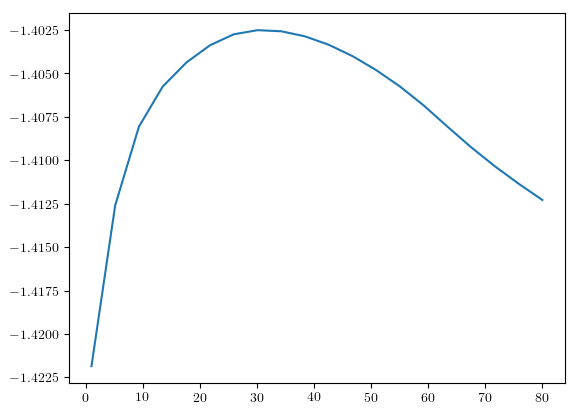

128.857504 seconds (175.09 M allocations: 324.853 GiB, 21.35% gc time)


30.105263157894736

In [11]:
## thik estimator
regs = [ThikonovRegularizer(γ) for γ in linspace(1,80,ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regT = regs[indmax(ss)].γ

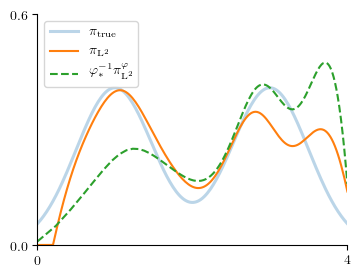

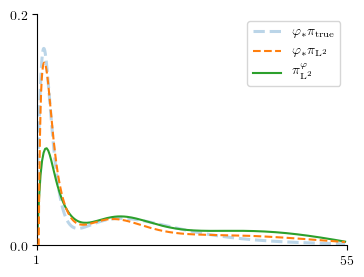

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f340fb2f3d0>), PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f3409f6d650>))

In [12]:
wT = ebprior(m,  d, ThikonovRegularizer(regT))
wTt = ebprior(mt, d, ThikonovRegularizer(regT))

compareplot(m, t, pdf.(prior, m.xs), wT, wTt, "L^2", lims...; figsize=figsize, savename="l2")

# Dirichlet Process estimator - not used anymore

212.

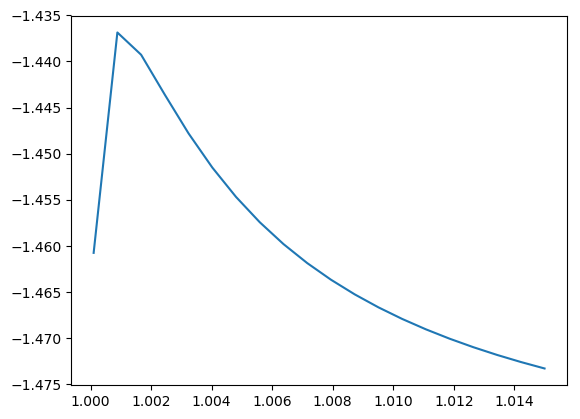

696764 seconds (171.15 M allocations: 210.451 GiB, 19.01% gc time)


1.0008842105263158

In [103]:
## dp estimator
regs = [DirichletRegularizer(α) for α in linspace(1.0001, 1.015, ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
plot([r.α for r in regs], ss)
regD = regs[indmax(ss)].α

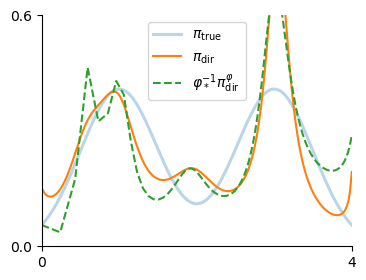

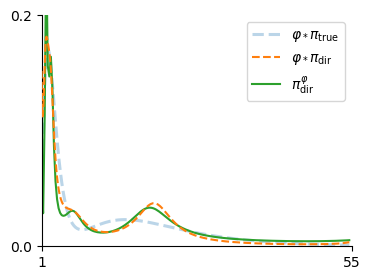

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7fc289d95ed0>), PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7fc289d67110>))

In [104]:
wD  = ebprior(m,  d, DirichletRegularizer(regD))
wDt = ebprior(mt, d, DirichletRegularizer(regD));

p1, p2 = compareplot(m, t, pdf.(prior, m.xs), wD, wDt, "dir", lims...; figsize=figsize, savename="dir")